### **Quantum Teleportation Protocol**

- Alice has an unknown qubit state ∣𝜓⟩ to send to Bob.

<br>

- Alice and Bob share a 2-qubit entangled pair (one e-bit).
    - Alice holds qubit A₂
    - Bob holds qubit B

<img src="teleportation.png" width="800" height="600">

<br>

---

**Protocol Steps**

<br>

1. Entangle Alice’s qubits
  Alice applies a CNOT gate with:
      - control = `|ψ⟩`
      - target = her half of the e-bit

<br>

2. Apply Hadamard
  Alice applies H on the `|ψ⟩` qubit.

<br>

3. Measure
  Alice measures both of her qubits in the computational basis.
  She obtains one of: 00, 01, 10, 11.

<br>

4. Send classical bits
  Alice sends these 2 classical bits to Bob.

<br>

5. Bob’s correction operations
  Based on Alice’s message:
    - 00 → Do nothing
    - 01 → Apply X
    - 10 → Apply Z
    - 11 → Apply iY = ZX

<br>

---

**Final Result**

<br>

 - Bob’s qubit becomes exactly the original state ∣ψ⟩.

<br>

 - The quantum state is successfully teleported.

In [115]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.quantum_info import Statevector

/Users/shyam/Documents/Quantum Projects/qiskit_venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


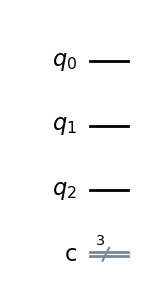

In [116]:
import numpy as np

np.random.seed(42)

# theta = np.random.uniform(0, 1) * np.pi
# phi = np.random.uniform(0, 2) * np.pi
theta = np.pi / 2
phi = 0

qc = QuantumCircuit(3, 3)
qc.draw("mpl")

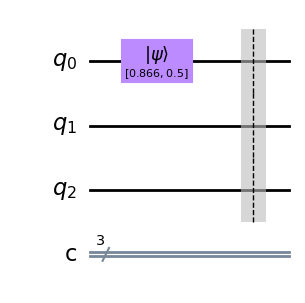

In [117]:
# qc.u(theta, phi, 0, 0)
a = np.sqrt(0.75)
b = np.sqrt(0.25)
qc.initialize([a, b], 0)
qc.barrier()
qc.draw("mpl")

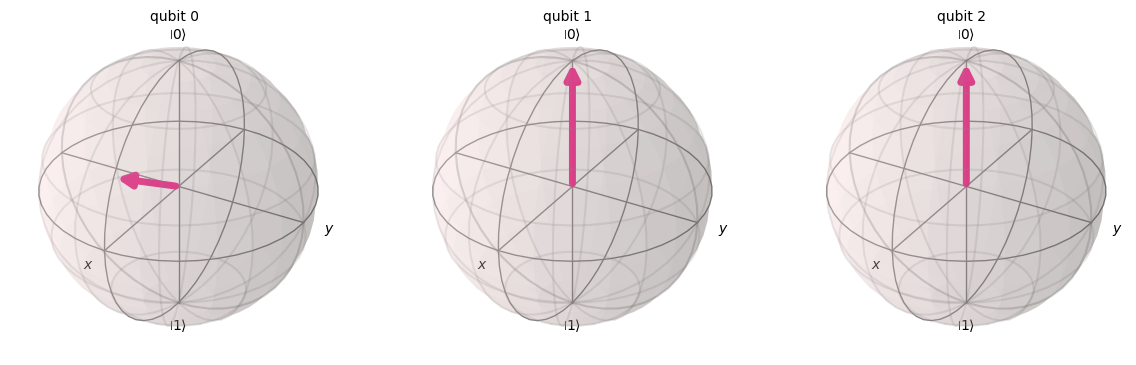

In [118]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(Statevector(qc))

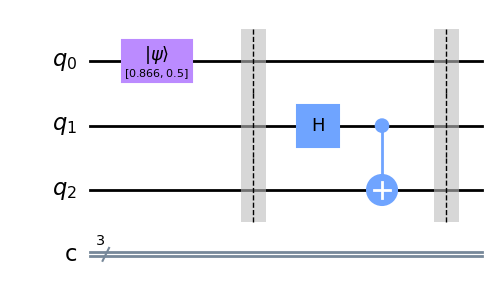

In [119]:
qc.h(1)
qc.cx(1, 2)
qc.barrier()
qc.draw("mpl")

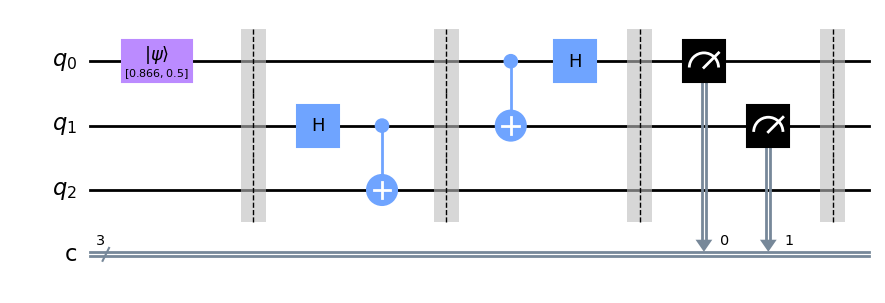

In [120]:
qc.cx(0, 1)
qc.h(0)
qc.barrier()

qc.measure(0, 0)
qc.measure(1, 1)
qc.barrier()

qc.draw("mpl")

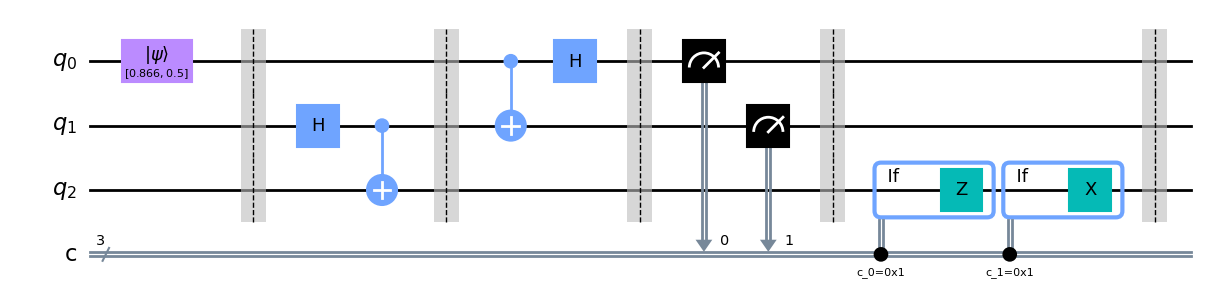

In [121]:
with qc.if_test((0, 1)):
    qc.z(2)
with qc.if_test((1, 1)):
    qc.x(2)

qc.barrier()
qc.draw(output="mpl")

In [122]:
# qc.u(theta, phi, 0.0, 2).inverse()
# qc.measure(2, 2)
# qc.draw(output="mpl")

{'011': 264, '010': 245, '000': 276, '001': 239}


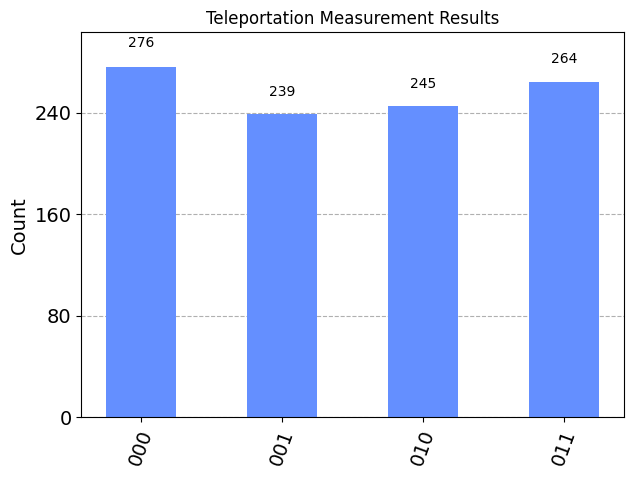

In [123]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt



nshots = 1024
backend = AerSimulator()

tqc = transpile(qc, backend, optimization_level=1)
job = backend.run(tqc, shots=nshots)
result = job.result()

counts = result.get_counts()

print(counts)
plot_histogram(counts, title="Teleportation Measurement Results")
